In [32]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

import math

import statsmodels.api as sm
from statsmodels.compat import lzip
import warnings

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("RIKZ.txt", sep="\t")

In [4]:
df.head()

,Richness,Exposure,NAP,Beach,Site
0,11,10,0.045,1,1
1,10,10,-1.036,1,2
2,13,10,-1.336,1,3
3,11,10,0.616,1,4
4,10,10,-0.684,1,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Richness  45 non-null     int64  
 1   Exposure  45 non-null     int64  
 2   NAP       45 non-null     float64
 3   Beach     45 non-null     int64  
 4   Site      45 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 1.9 KB


In [6]:
df.describe()

,Richness,Exposure,NAP,Beach,Site
count,45.000000,45.000000,45.000000,45.000000,45.000000
mean,5.688889,10.222222,0.347689,5.000000,3.000000
std,5.003736,0.926599,0.994315,2.611165,1.430194
min,0.000000,8.000000,-1.336000,1.000000,1.000000
25%,3.000000,10.000000,-0.375000,3.000000,2.000000
50%,4.000000,10.000000,0.167000,5.000000,3.000000
75%,8.000000,11.000000,1.117000,7.000000,4.000000
max,22.000000,11.000000,2.255000,9.000000,5.000000


In [7]:
df.Beach = pd.Categorical(df.Beach)

In [8]:
df.isnull().sum()

Richness    0
Exposure    0
NAP         0
Beach       0
Site        0
dtype: int64

In [9]:
df.isna().sum()

Richness    0
Exposure    0
NAP         0
Beach       0
Site        0
dtype: int64

In [10]:
df.head()

,Richness,Exposure,NAP,Beach,Site
0,11,10,0.045,1,1
1,10,10,-1.036,1,2
2,13,10,-1.336,1,3
3,11,10,0.616,1,4
4,10,10,-0.684,1,5


In [11]:
df.Richness

0     11
1     10
2     13
3     11
4     10
5      8
6      9
7      8
8     19
9     17
10     6
11     1
12     4
13     3
14     3
15     1
16     3
17     3
18     1
19     4
20     3
21    22
22     6
23     0
24     6
25     5
26     4
27     1
28     6
29     4
30     2
31     1
32     1
33     3
34     4
35     3
36     5
37     7
38     5
39     0
40     7
41    11
42     3
43     0
44     2
Name: Richness, dtype: int64

In [12]:
type(df)

pandas.core.frame.DataFrame

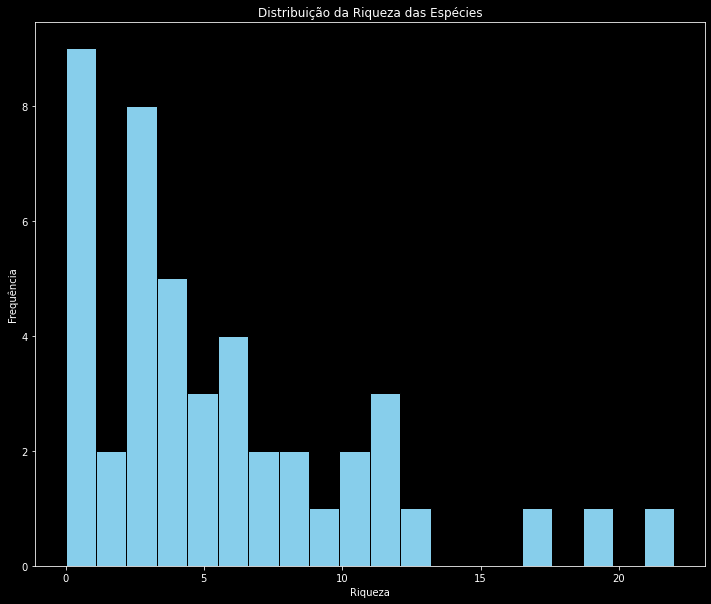

In [13]:
## 
plt.figure(figsize=(12, 10))
plt.hist(df["Richness"], bins=20, density=False, color="skyblue", edgecolor="black")
# Adiciona título e rótulos dos eixos
plt.title("Distribuição da Riqueza das Espécies")
plt.xlabel("Riqueza")
plt.ylabel("Frequência")

# Exibe o histograma
plt.show()

Análisando a distribuição dos dados, aparentemente ela tem uma dustribuição a esqueda. Bem semelhante a distribuição de poisson.

In [14]:
df["Nap_Beach"] = df['NAP'] * df['Beach'].cat.codes

In [15]:
## Inicializando o modelo de poison
model_P = sm.GLM(
    df["Richness"],
    sm.add_constant(df[["NAP", "Beach", "Nap_Beach"]]),
    family=sm.families.Poisson(),
).fit()

In [16]:
print(model_P.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Richness   No. Observations:                   45
Model:                            GLM   Df Residuals:                       41
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -115.83
Date:                Sat, 30 Mar 2024   Deviance:                       89.663
Time:                        00:06:43   Pearson chi2:                     100.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.8649
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3369      0.126     18.578      0.0

* O R ao quadrado indica que o modelo explica aproximadamente 86% da variação observada.
* Neste caso, a constante (const) e a variável Beach têm valores P muito baixos (próximos de zero), o que indica que elas são estatisticamente significativas.

Agora vamos avaliar o modelo sem Nap_Beach sem interação.

In [17]:
# Ajuste o modelo de Poisson sem interação
model_P_n = sm.GLM(
    df["Richness"],
    sm.add_constant(df[["NAP", "Beach"]]),
    family=sm.families.Poisson(),
).fit()

In [18]:
print(model_P_n.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Richness   No. Observations:                   45
Model:                            GLM   Df Residuals:                       42
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -119.86
Date:                Sat, 30 Mar 2024   Deviance:                       97.712
Time:                        00:06:43   Pearson chi2:                     110.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.8385
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2321      0.124     18.019      0.0

* O R quadrado também muito bom indicando 83% dos nossos dados.
* O teste de significancia também menor que 0.05 o que indica uma boa significância.

Para ter mais certezas vamos aplicar algumas análises de pressupostos comparando os modelos.
* Verifique a homogeneidade da variância dos resíduos.
* Verifique a normalidade dos resíduos.
* Avalie a significância dos coeficientes e a qualidade de ajuste dos modelos.
* Compare os modelos utilizando critérios como AIC ou BIC.

In [19]:
resid = model_P.resid_pearson
X = sm.add_constant(df[["NAP", "Beach", "Nap_Beach"]])

result_bptest = sm.stats.diagnostic.het_breuschpagan(resid, X)


In [20]:
label = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print("Modelo 1 - com interações")
print(lzip(label, result_bptest))

Modelo 1 - com interações
[('LM Statistic', 1.291377059367933), ('LM-Test p-value', 0.7311816905544806), ('F-Statistic', 0.40378347849882096), ('F-Test p-value', 0.7510436641305898)]


In [21]:
resid = model_P_n.resid_pearson
X = sm.add_constant(df[["NAP", "Beach"]])

result_bptest = sm.stats.diagnostic.het_breuschpagan(resid, X)

In [22]:
label = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print("Modelo 2 - sem interações")
print(lzip(label, result_bptest))

Modelo 2 - sem interações
[('LM Statistic', 0.7737677072678051), ('LM-Test p-value', 0.6791699734702012), ('F-Statistic', 0.36740913729823044), ('F-Test p-value', 0.6947299258188568)]


Para ambos os modelos os p valores do teste LM e F são maiores que 0.05, assim concluimos que há evidências suficientes para rejeitar a hipótese nula de homocedasticidade para ambos os modelos.

In [23]:
resid = model_P.resid_pearson

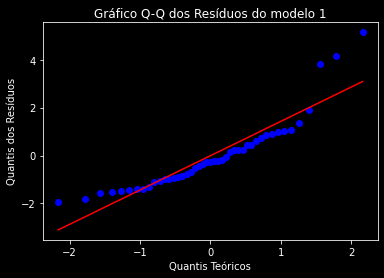

In [24]:
st.probplot(resid, dist="norm", plot=plt)
plt.title("Gráfico Q-Q dos Resíduos do modelo 1")
plt.xlabel("Quantis Teóricos")
plt.ylabel("Quantis dos Resíduos")
plt.show()

In [25]:
resid = model_P_n.resid_pearson

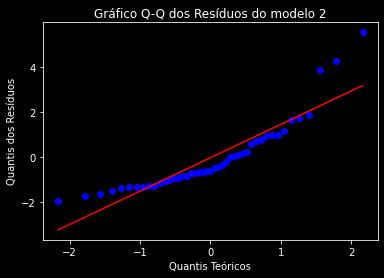

In [26]:
st.probplot(resid, dist="norm", plot=plt)
plt.title("Gráfico Q-Q dos Resíduos do modelo 2")
plt.xlabel("Quantis Teóricos")
plt.ylabel("Quantis dos Resíduos")
plt.show()

Conseguimos identificar o modelo dois aparentemente no gráfico temos uma distancia maior entre 1 e -1.

Isso nos indica que o modelo 1 explica melhor nossos dados.

In [27]:
resid = model_P.resid_pearson

In [28]:
# Teste de Shapiro-Wilk

stat, p_valor = st.shapiro(resid)
print("Estatística de Teste do modelo 1:", stat)
print("p-valor:", p_valor)

Estatística de Teste do modelo 1: 0.8548638684080951
p-valor: 4.895942589690391e-05


In [29]:
resid = model_P_n.resid_pearson

In [30]:
# Teste de Shapiro-Wilk

stat, p_valor = st.shapiro(resid)
print("Estatística de Teste do modelo 2:", stat)
print("p-valor:", p_valor)

Estatística de Teste do modelo 2: 0.8335282239414797
p-valor: 1.4172651879433216e-05


Ambos os modelos apresentam um p valor pequeno.

In [33]:

n = len(df)
AIC_model_P = 2 * len(model_P.params) - 2*model_P.llf
BIC_model_P = model_P.params * math.log(n)  - 2 * model_P.llf

In [34]:
AIC_model_P_n = 2 * len(model_P_n.params) - 2 * model_P_n.llf
BIC_model_P_n = model_P_n.params * math.log(n) - 2 * model_P_n.llf

In [36]:
print("---------------Modelo 1---------------")
print("AIC: ", AIC_model_P)
print("BIC: ", BIC_model_P)

print("---------------Modelo 2---------------")
print("AIC: ", AIC_model_P_n)
print("BIC: ", BIC_model_P_n)

---------------Modelo 1---------------
AIC:  239.6617704229625
BIC:  const        240.557522
NAP          230.867870
Beach        231.224797
Nap_Beach    231.331995
dtype: float64
---------------Modelo 2---------------
AIC:  245.71041415489273
BIC:  const    248.207343
NAP      237.929658
Beach    239.331440
dtype: float64


Com base no AIC e BIC podemos então notar que o modelo 1 é melhor que o modelo 2.